# Solución del análisis cinemático inverso del Robot Manipulador Paralelo tipo Delta

La teoría abordada en este cuaderno se describe aquí: 

**https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_Teoria.ipynb**

En la imagen podemos observar la posición inicial del robot Delta de la UPB. Esta posición corresponde a los ángulos de los tres motores $\theta = -23.5°$. A esta posición se le llama HOME.

Realizando mediciones en el modelo CAD del robot Delta de la UPB, se obtuvieron los siguientes parámetros y condiciones iniciales:

Parámetros

$r = 144.34$ mm

$a = 200.87$ mm

$b = 526.69$ mm

$h = 50$ mm

$\phi = 30°$

Variables de entrada:

$P = [0,0,-528.67]$ mm

Condiciones iniciales: 

$Q = [284.53,164.27,-80.09]$ mm

Con esto se tiene información suficiente para resolver el problema de la cinemática inversa de este robot.

Partimos de las ecuaciones que modelan la geometría de éste en función del punto Q:

\begin{equation}
\label{eq:esfera1}
(Q_x - D_x)^2+(Q_y - D_y)^2+(Q_z - D_z)^2 = a^2
\end{equation}

\begin{equation}
\label{eq:esfera2}
(Q_x - C_x)^2+(Q_y - C_y)^2+(Q_z - C_z)^2 = b^2
\end{equation}

\begin{equation}
\label{eq:plano}
Q_x cos(\phi + 90°)+Q_y sin(\phi + 90°) = 0
\end{equation}

considerando que

$D_x = rcos(\phi)$, $D_y = rsin(\phi)$, $D_z = 0$, $C_x = P_x + hcos(\phi)$, $C_y = P_y + hsin(\phi)$ y $C_z = Pz$.

Al resolver este sistema de ecuaciones tendremos la ubicación del punto $Q$ para una cadena cinemática. 

**Se debe repetir el proceso para las demás cadenas considerando las diferencias que hay entre cada una, i.e., la orientación $\phi$ y las condiciones iniciales.**

## Solución por métodos numéricos

Para resolver este sistema de ecuaciones utilizaremos métodos numéricos, como se muestra a continuación.

### Limpiar entorno

Esto es útil durante la etapa de desarrollo del código, para evitar problemas con variables en memoria que no estemos manejando.

In [299]:
## magia de IPython para limpiar variables del entorno, REQUIERE IPython
## para correr en un script se debe importar el módulo de IPython
# from IPython import get_ipython
# get_ipython().magic('reset -sf')
%reset -sf

### Importar módulos

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
#para realizar animaciones
from matplotlib.animation import FuncAnimation
from matplotlib import rc
#para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D
# para exportar e importar variables a archivos
import pickle

### Definir función

In [301]:
def fn_delta(condIni,params):
    #Vars. de entrada
    px = params[0]
    py = params[1]
    pz = params[2]
    #parametros
    a =  params[3]
    b =  params[4]
    h =  params[5]
    r =  params[6]
    phi= params[7]
    
    Qx = condIni[0]
    Qy = condIni[1]
    Qz = condIni[2]
    
    Dx = r*np.cos(phi);
    Dy = r*np.sin(phi);
    Dz = 0;
    Cx = px + h*np.cos(phi);
    Cy = py + h*np.sin(phi);
    Cz = pz;
    
    Y = np.zeros(3)
    Y[0] = (Qx-Dx)**2 + (Qy-Dy)**2 + (Qz-Dz)**2 - a**2
    Y[1] = (Qx-Cx)**2 + (Qy-Cy)**2 + (Qz-Cz)**2 - b**2
    Y[2] = Qx*np.cos(phi + (np.pi/2)) + Qy*np.sin(phi + (np.pi/2))
    return Y

### Probar función

In [302]:
# Posición HOME del robot, theta = 23.5°

px = 0;
py = 0;
pz = -528.6718

#eje motores a eje paralelogramo superior (esf?ricos)
a=200.87
#longitud paralelogramo
b=526.695
#distancia eje paralelogramo inferior (esf?ricos) a centro de la base m?vil
h= 52.528
#base fija a eje motores [mm]
r=144.34 

phi=np.deg2rad(30)

parametros = [px,py,pz,a,b,h,r,phi]

Qx_ini = 284.5325
Qy_ini = 164.2749
Qz_ini = -80.0967

x0 = [Qx_ini,Qy_ini,Qz_ini]

fn_delta(x0,parametros)

array([-1.65848887e-02,  4.41989296e-02, -1.33958517e-05])

### Resolver el sistema para las condiciones iniciales

In [303]:
q,info,exitflag,mensaje = fsolve(fn_delta,x0,args = parametros,full_output = True)
print("Condiciones iniciales = ",x0)
print("solucion = ",q,"\n",exitflag,"\n",mensaje)

Qx = q[0]
Qy = q[1]
Qz = q[2]

Condiciones iniciales =  [284.5325, 164.2749, -80.0967]
solucion =  [284.53250942 164.27492091 -80.09676072] 
 1 
 The solution converged.


### Definir puntos para graficar

In [304]:
Dx = r*np.cos(phi)
Dy = r*np.sin(phi)
Dz = 0
Cx = px + h*np.cos(phi)
Cy = py + h*np.sin(phi)
Cz = pz

## Gráficas en 3D

Vamos a implementar unos cuantos comandos para hacer que las gráficas en 3D se vean bien

1. Activar la función notebook de matplotlib para hacer las gráficas interactivas. Esto se hace usando la siguiente magia

In [314]:
# Activar esta magia en Jupyter para generar gráfica interactiva
# En Spyder, comentar esta línea
%matplotlib notebook

### Graficar posición inicial

1. Creamos la figura
2. Cambiamos el tamaño de la ventana
3. Creamos los ejes con la característica de proyección 3d y vistas ortogonales para desactivar la perspectiva
4. Podemos cambiar la vista usando combinaciones de ángulos "elevación" y "azimut"

    vista iso = elev = 30°, azimut = 315°

    vista superior = elev = 90°, azimut = 270°

    vista frontal = elev = 0°, azimut = 270°
5. Graficamos los puntos
6. ajustamos los ejes, se requiere un factor de escala manual ya que mplot3d aún no implementa la escala de ejes

<IPython.core.display.Javascript object>


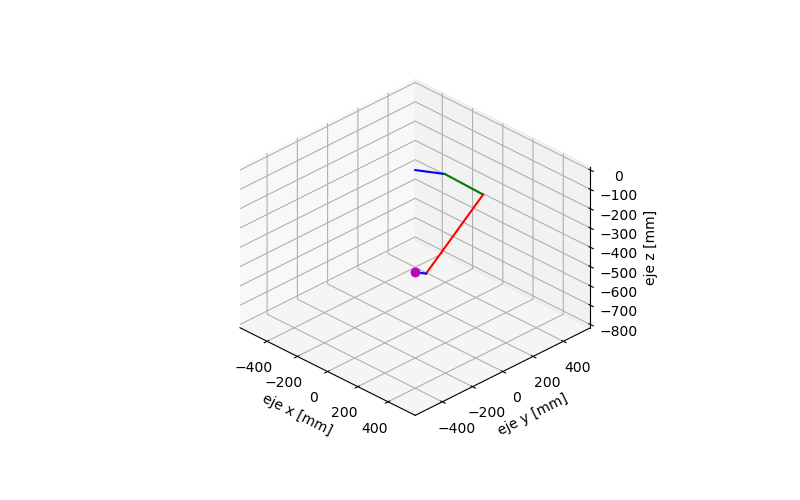

Text(0.5, 0, 'eje z [mm]')

In [316]:
fig1 = plt.figure()
plt.rcParams['figure.figsize'] = [8, 5]
ax1 = fig1.add_subplot(111,projection = '3d', proj_type = 'ortho')

ax1.view_init(elev=30, azim=315)

ax1.plot([Dx,0],[Dy,0],[Dz,0],'-b')
h_a1 = ax1.plot([Dx,Qx],[Dy,Qy],[Dz,Qz],'-g')
h_b1 = ax1.plot([Cx,Qx],[Cy,Qy],[Cz,Qz],'-r')
h_h1 = ax1.plot([Cx,px],[Cy,py],[Cz,pz],'-b')
h_P = ax1.plot(px,py,pz,'mo',linewidth = 2)
fEscala = 1.39
ax1.set_xlim3d(-400*fEscala,400*fEscala)
ax1.set_ylim3d(-400*fEscala,400*fEscala)
ax1.set_zlim3d(-800,0)
ax1.set_xlabel("eje x [mm]")
ax1.set_ylabel("eje y [mm]")
ax1.set_zlabel("eje z [mm]")

### Solución para las otras cadenas cinemáticas

Actividad propuesta: ¿qué se debe definir para encontrar la posición de las otras dos cadenas?

pista: $\phi$ y $Q$

## Trayectorias

El objetivo del robot es realizar trabajos. Esto se logra desplazando el punto de interés P por el espacio, de manera que la herramienta que tenga de momento logre posicionarse donde se necesita. Esto en términos cinemáticos se traduce a definir trayectorias que el punto P debe recorrer.

Una trayectoria se compone de un conjunto de coordenadas sucesivas. Debemos especificar las trayectorias de manera que no haya una distancia muy amplia entre los puntos que la componen. 

Por ejemplo, vamos a hacer que el robot recorra una trayectoria lineal, desde la posición HOME hasta un punto alejado 100 mm en los tres ejes de dicha posición. Esto se vería así:

### Implementación

Vamos a especificar un mínimo de 50 puntos por trayectoria. Esto corresponde con el número de posiciones, anteriormente denominado *numpos*

In [307]:
numpos = 50

Ahora definimos la trayectoria. Como es lineal, podemos usar la función *linspace*

In [308]:
pxv = np.linspace(0,100,numpos)
pyv = np.linspace(0,100,numpos)
pzv = np.linspace(pz,pz-100,numpos)
pxv

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

Grafiquemos la trayectoria

<IPython.core.display.Javascript object>


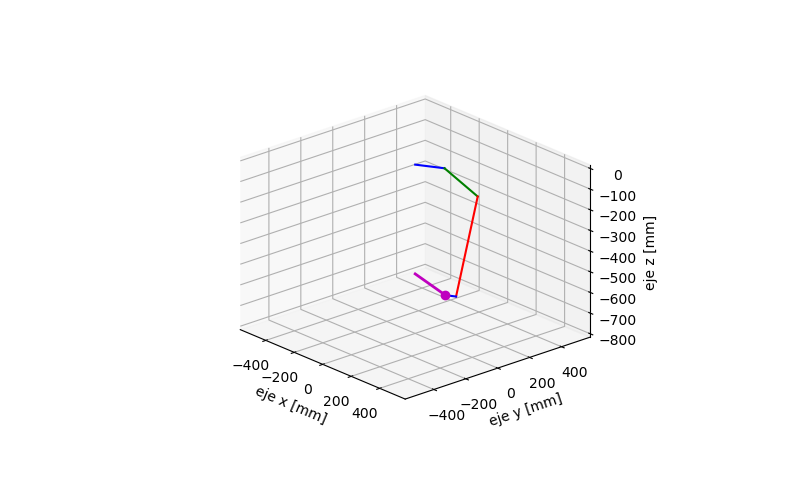

In [317]:
fig1 = plt.figure()
plt.rcParams['figure.figsize'] = [8, 5]
ax1 = fig1.add_subplot(111,projection = '3d', proj_type = 'ortho')

ax1.view_init(elev=30, azim=315)

ax1.plot([Dx,0],[Dy,0],[Dz,0],'-b')
h_a1 = ax1.plot([Dx,Qx],[Dy,Qy],[Dz,Qz],'-g')
h_b1 = ax1.plot([Cx,Qx],[Cy,Qy],[Cz,Qz],'-r')
h_h1 = ax1.plot([Cx,px],[Cy,py],[Cz,pz],'-b')
h_P = ax1.plot(px,py,pz,'mo',linewidth = 2)
ax1.plot(pxv,pyv,pzv,'-m',linewidth = 2)
fEscala = 1.39
ax1.set_xlim3d(-400*fEscala,400*fEscala)
ax1.set_ylim3d(-400*fEscala,400*fEscala)
ax1.set_zlim3d(0,-800)
ax1.set_xlabel("eje x [mm]")
ax1.set_ylabel("eje y [mm]")
ax1.set_zlabel("eje z [mm]")
ax1.invert_zaxis()

También debemos definir la posición de todos los puntos que se mueven en el mecanismo, es decir, los puntos $C$ y $Q$. El último lo debemos hallar con la solución de las ecuaciones, mientras que el primero es conocido ya que depende de $P$:

In [310]:
Cxv = pxv + h*np.cos(phi)
Cyv = pyv + h*np.sin(phi)
Czv = pzv

Luego resolvemos para todas las posiciones *numpos* de la trayectoria

In [311]:
EXITFLAG = np.zeros(numpos)
Qxv = np.zeros(numpos)
Qyv = np.zeros(numpos)
Qzv = np.zeros(numpos)

for i in range(0,numpos):
    parametros[0] = pxv[i]
    parametros[1] = pyv[i]
    parametros[2] = pzv[i]
    Y,info,EXITFLAG[i],msg = fsolve(fn_delta,x0,args = parametros,full_output = True)
    x0 = Y
    Qxv[i] = Y[0];
    Qyv[i] = Y[1];
    Qzv[i] = Y[2];
    
Qxv,Qyv,Qzv

(array([284.53250942, 284.43166595, 284.32242948, 284.20473551,
        284.07851169, 283.94367777, 283.80014557, 283.64781885,
        283.48659326, 283.31635621, 283.13698677, 282.94835554,
        282.75032449, 282.54274679, 282.32546668, 282.0983192 ,
        281.86113001, 281.61371516, 281.35588076, 281.08742278,
        280.80812665, 280.51776697, 280.2161071 , 279.90289876,
        279.57788159, 279.24078265, 278.89131588, 278.52918156,
        278.15406567, 277.76563919, 277.36355739, 276.94745902,
        276.51696542, 276.07167959, 275.61118515, 275.13504521,
        274.64280112, 274.13397117, 273.60804906, 273.06450233,
        272.5027706 , 271.9222636 , 271.32235904, 270.70240029,
        270.06169377, 269.39950608, 268.71506086, 268.00753522,
        267.27605584, 266.51969462]),
 array([164.27492091, 164.2166989 , 164.1536312 , 164.08568055,
        164.01280519, 163.93495879, 163.85209044, 163.76414457,
        163.67106093, 163.57277452, 163.46921553, 163.36030924,
  

si todo salió bien, podemos proceder con la animación.

In [319]:
def animar(i):
    brazo_X = np.array([Dx,Qxv[i]])
    brazo_Y = np.array([Dy,Qyv[i]])
    brazo_Z = np.array([Dz,Qzv[i]])
    antebrazo_X = np.array([Cxv[i],Qxv[i]])
    antebrazo_Y = np.array([Cyv[i],Qyv[i]])
    antebrazo_Z = np.array([Czv[i],Qzv[i]])
    bmovil_X = np.array([Cxv[i],pxv[i]])
    bmovil_Y = np.array([Cyv[i],pyv[i]])
    bmovil_Z = np.array([Czv[i],pzv[i]])
    h_a1[0].set_data_3d([brazo_X,brazo_Y,brazo_Z])
    h_b1[0].set_data_3d([antebrazo_X,antebrazo_Y,antebrazo_Z])
    h_h1[0].set_data_3d([bmovil_X,bmovil_Y,bmovil_Z])
    h_P[0].set_data_3d([pxv[i],pyv[i],pzv[i]])

animacion = FuncAnimation(fig1, animar, interval=3000/numpos, save_count=numpos,blit=True)
#plt.show()

from IPython.display import HTML
HTML(animacion.to_html5_video())
HTML(animacion.to_jshtml())

## Solución para el robot completo